In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plot
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

plot.style.use('fast')

In [3]:
import sys
sys.path

['/Users/superb/Innovation Hub/enerphant/BEM',
 '/anaconda3/lib/python37.zip',
 '/anaconda3/lib/python3.7',
 '/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/anaconda3/lib/python3.7/site-packages',
 '/anaconda3/lib/python3.7/site-packages/aeosa',
 '/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/superb/.ipython']

In [4]:
#Import csv & data prep.
b2 = pd.read_csv('/Users/superb/Innovation Hub/enerphant/BEM/BEMS-22 [2019-07-15-2019-09-10].csv')

b2['Time'] = list(map(lambda i: i[ : -1], b2['Time']))
b2['Datetime'] = pd.to_datetime(b2['Date'] + ' ' + b2['Time'])
b2 = b2.drop(['Date','Time'], axis = 1)
b2 = b2.set_index('Datetime')
b2.drop(b2.columns[18:],axis=1,inplace=True)

b2['P(kW)'] = b2['P1(kW)'] + b2['P2(kW)'] + b2['P3(kW)']

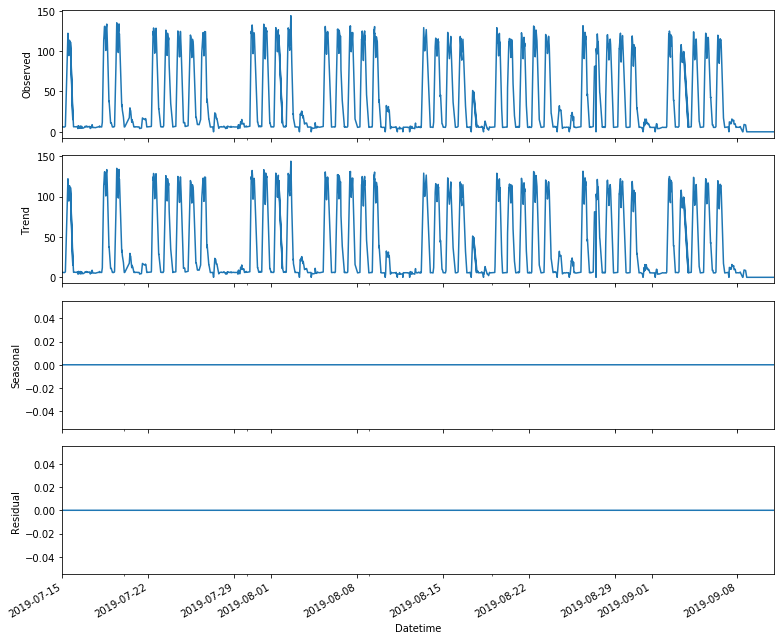

In [5]:
#Data Visualization 
#1. Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 11, 9
series = b2['P(kW)']
result = seasonal_decompose(series, model='additive',freq=1)
fig = result.plot()
plot.show()

Text(0.5, 0, 'Date')

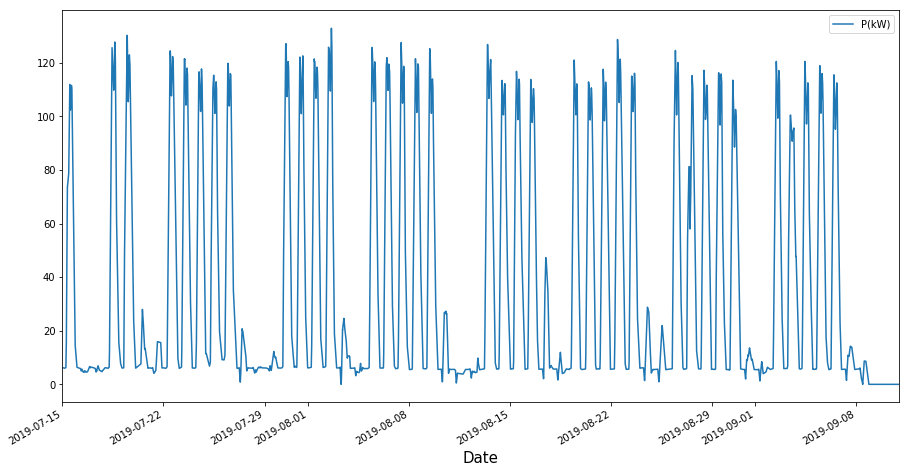

In [6]:
#2. Rolling mean

b2_LP = b2[['P(kW)']]
b2_LP.rolling(7).mean().plot(figsize=(15,8))
plot.xlabel('Date', fontsize=15)

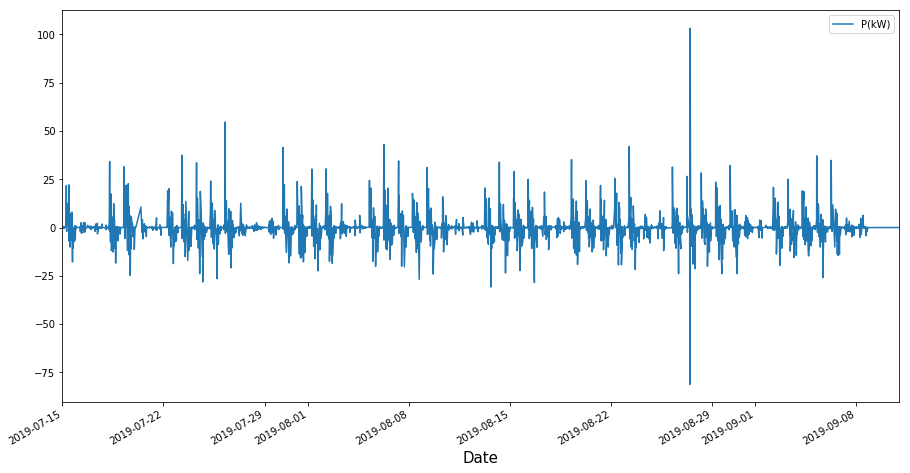

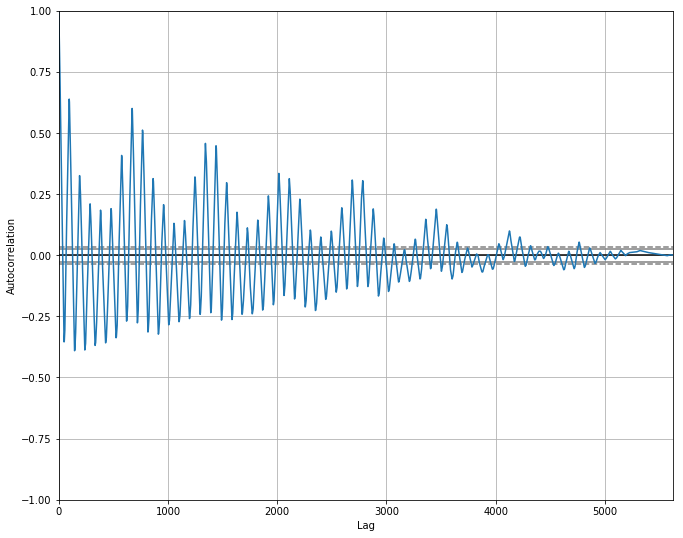

In [7]:
#3. Diff

b2_LP.diff().plot(figsize=(15,8))
plot.xlabel('Date', fontsize=15)
plot.show()
pd.plotting.autocorrelation_plot(b2_LP)

In [ ]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = b2_LP
X = series.values
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)